In [6]:
import os
#os.chdir("../")
%pwd

'/Users/krishnachaitanyaj/Practice/foodclassification'

In [7]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

random.seed(42)

In [8]:
training_dataframe = pd.read_csv("artifacts/data_ingestion/train_img.csv")

classes = training_dataframe['ClassName'].unique()

In [9]:
training_dataframe.shape

(9323, 2)

In [10]:
training_dataframe.head()

,ImageId,ClassName
0,f27632d7e5.jpg,water
1,efa87919ed.jpg,pizza-margherita-baked
2,4f169e8c8d.jpg,broccoli
3,a6956654bf.jpg,salad-leaf-salad-green
4,d99ce8c3bf.jpg,egg


In [19]:
np.unique(training_dataframe["ClassName"], return_counts=True)[1]

array([ 69, 191,  88, 181,  80,  68,  85,  61,  63, 595,  74, 398,  84,
       346, 297, 137, 106, 136, 377,  37,  75, 107,  88, 209, 195,  75,
        71,  66, 112,  65, 163,  87,  69,  43,  81, 169, 237,  41,  68,
        97,  28, 110, 156, 256, 535,  49,  51,  61,  48,  87,  84, 177,
        69, 358, 110, 863,  86, 122, 241, 151,  90])

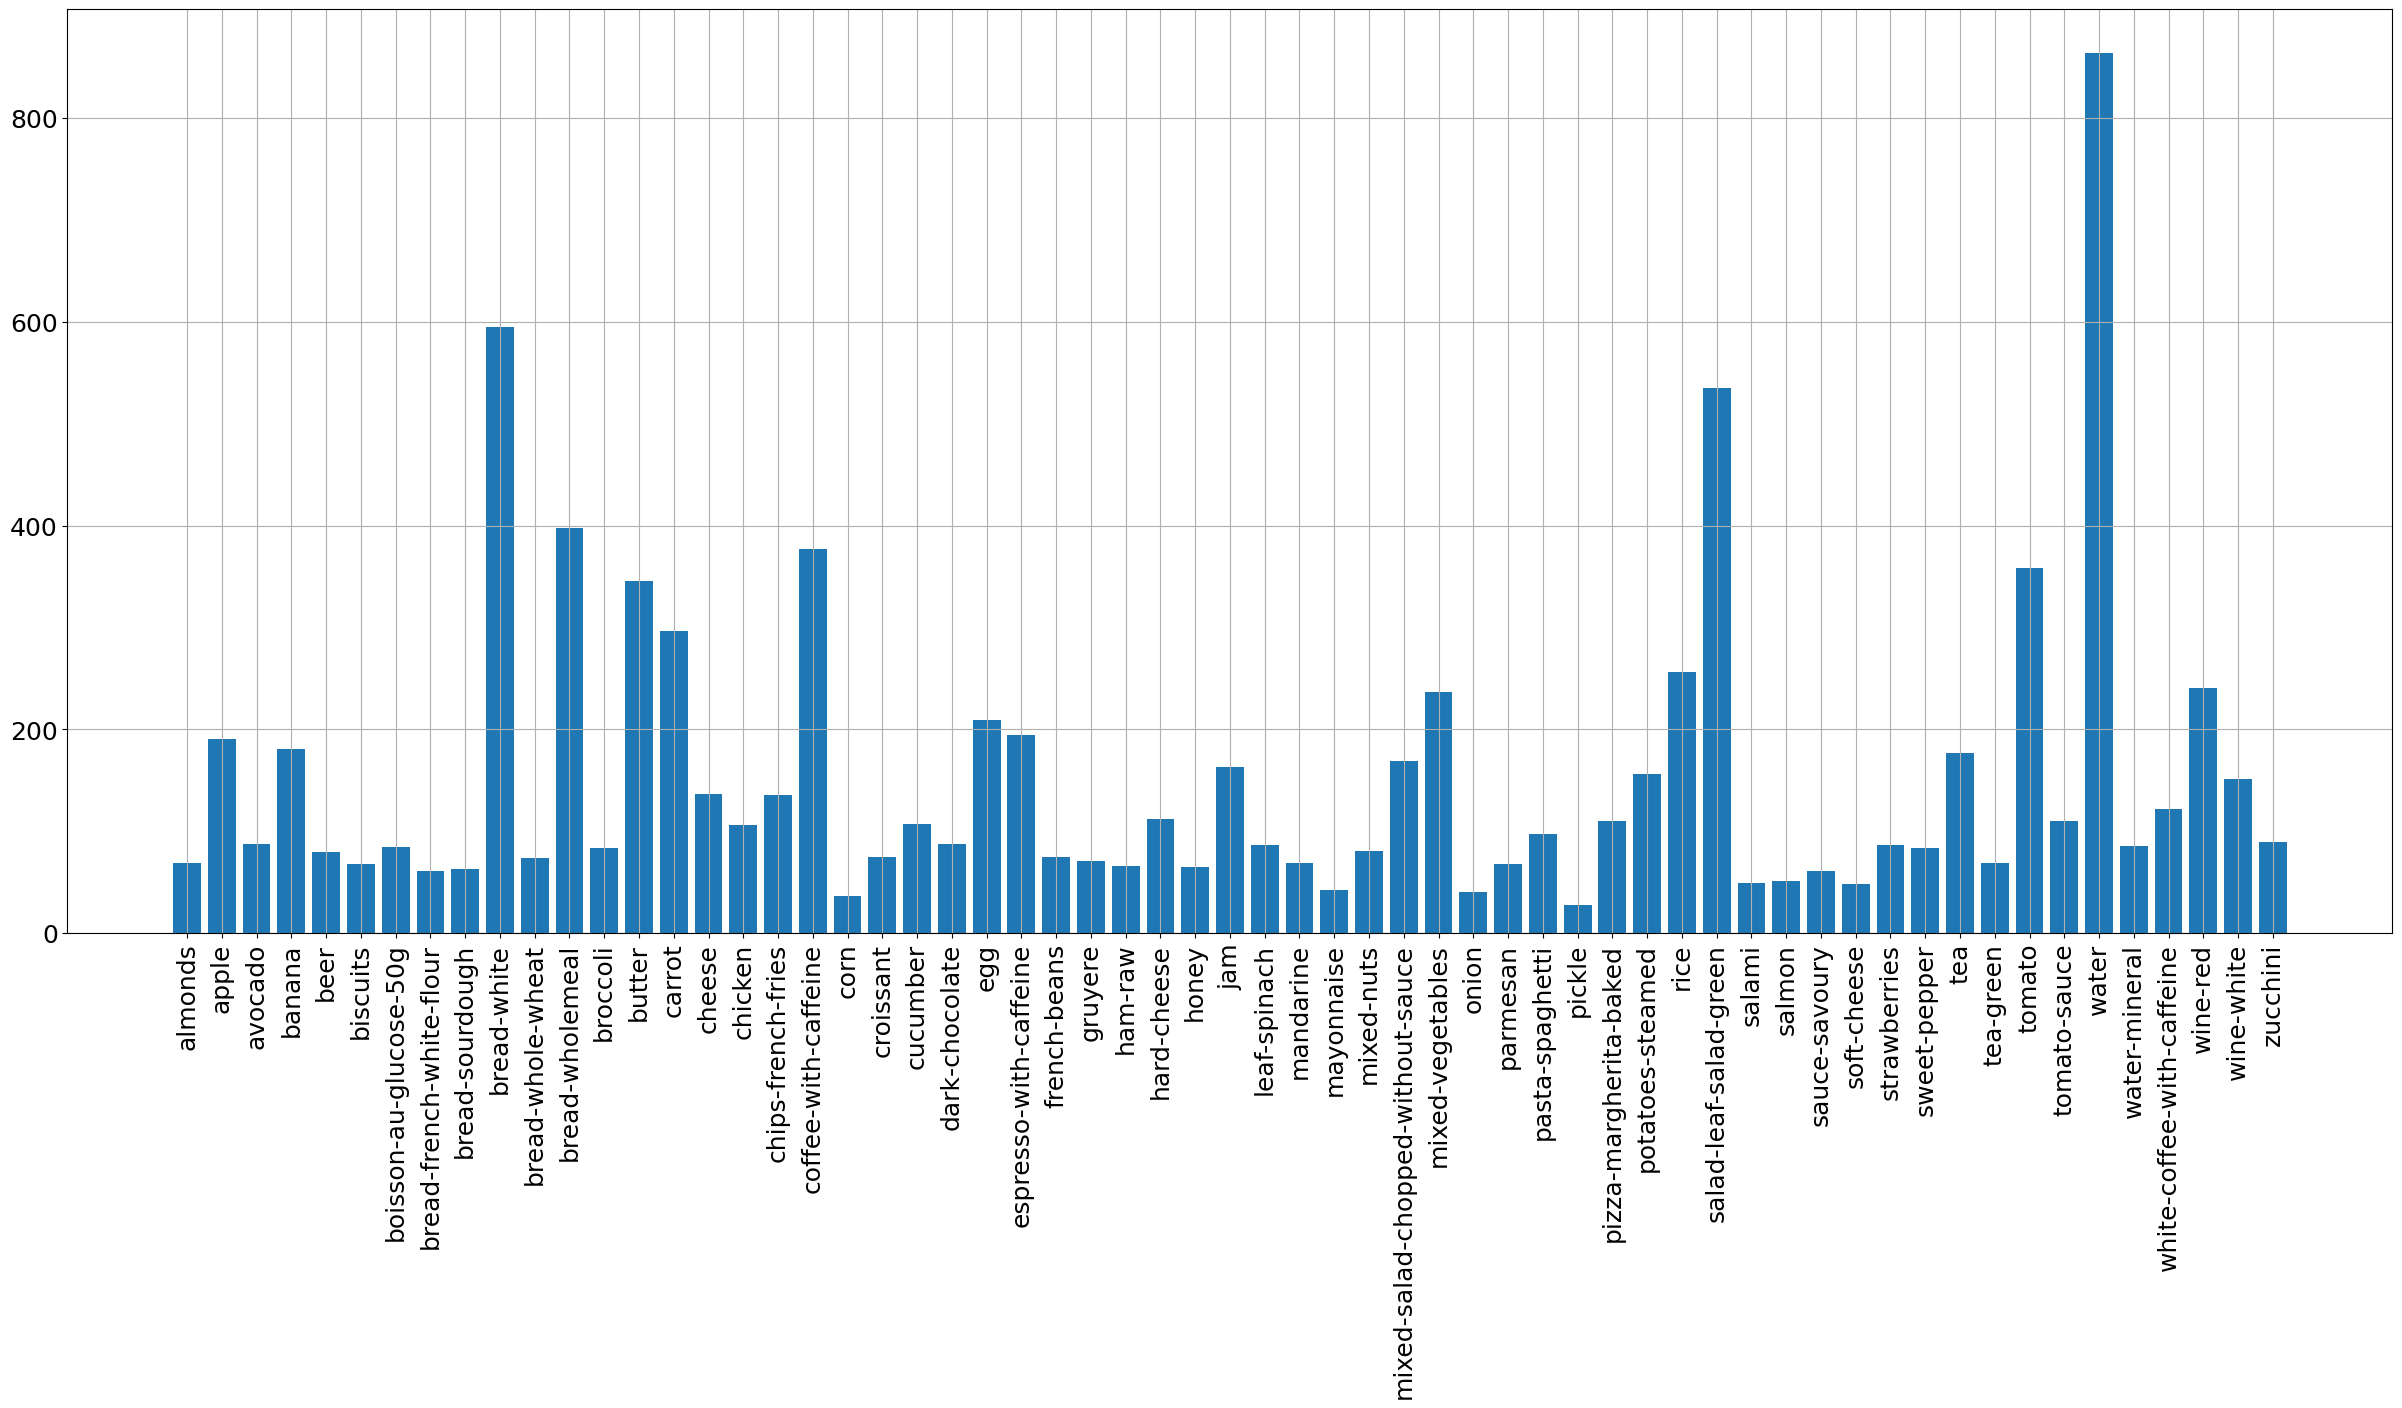

In [17]:
plt.figure(figsize=(30,12))
plt.bar(np.unique(training_dataframe["ClassName"], return_counts=True)[0],np.unique(training_dataframe["ClassName"], return_counts=True)[1])
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

In [20]:
training_dataframe.drop_duplicates(subset=["ClassName"])["ImageId"]

0       f27632d7e5.jpg
1       efa87919ed.jpg
2       4f169e8c8d.jpg
3       a6956654bf.jpg
4       d99ce8c3bf.jpg
             ...      
372     11a021fe80.jpg
403     3d14f9187d.jpg
443     244e96cd25.jpg
1053    8a8ff5060a.jpg
1198    698ece9f1d.jpg
Name: ImageId, Length: 61, dtype: object

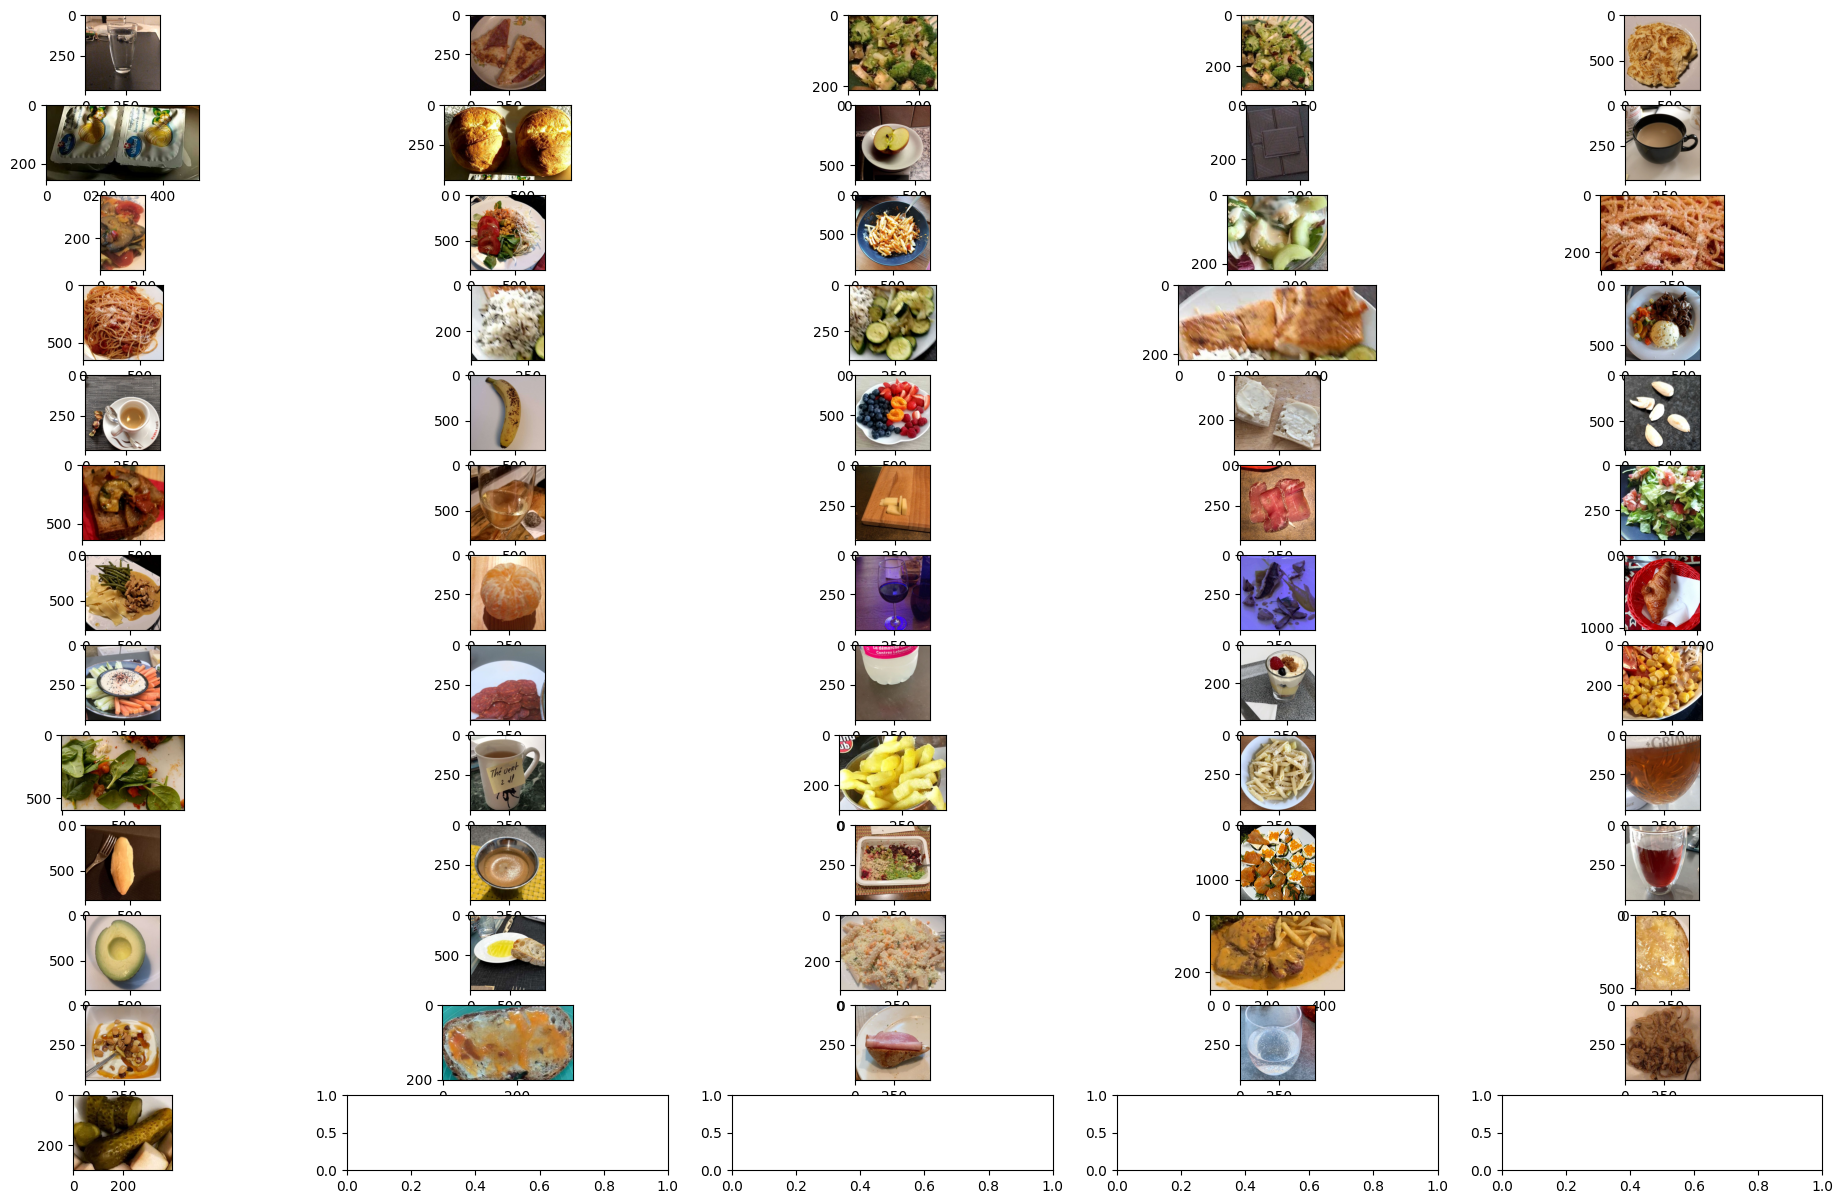

In [22]:
fig, ax = plt.subplots(nrows=13, ncols=5, figsize=(24,15))

cnt = 0

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        try:
            img = cv2.imread("artifacts/data_ingestion/train_images/train_images/" + np.asarray(training_dataframe.drop_duplicates(subset= ["ClassName"])["ImageId"])[cnt], cv2.IMREAD_COLOR)
            ax[i,j].imshow(img[...,::-1])
            cnt += 1
        except:
            pass
plt.show()

In [23]:
class_names = pd.get_dummies(training_dataframe["ClassName"]).columns

In [24]:
class_names

Index(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour', 'bread-sourdough',
       'bread-white', 'bread-whole-wheat', 'bread-wholemeal', 'broccoli',
       'butter', 'carrot', 'cheese', 'chicken', 'chips-french-fries',
       'coffee-with-caffeine', 'corn', 'croissant', 'cucumber',
       'dark-chocolate', 'egg', 'espresso-with-caffeine', 'french-beans',
       'gruyere', 'ham-raw', 'hard-cheese', 'honey', 'jam', 'leaf-spinach',
       'mandarine', 'mayonnaise', 'mixed-nuts',
       'mixed-salad-chopped-without-sauce', 'mixed-vegetables', 'onion',
       'parmesan', 'pasta-spaghetti', 'pickle', 'pizza-margherita-baked',
       'potatoes-steamed', 'rice', 'salad-leaf-salad-green', 'salami',
       'salmon', 'sauce-savoury', 'soft-cheese', 'strawberries',
       'sweet-pepper', 'tea', 'tea-green', 'tomato', 'tomato-sauce', 'water',
       'water-mineral', 'white-coffee-with-caffeine', 'wine-red', 'wine-white',
     

In [25]:
y_dev = np.asarray(pd.get_dummies(training_dataframe["ClassName"]))

In [26]:
y_dev.shape

(9323, 61)

In [27]:
X_dev = np.asanyarray(training_dataframe["ImageId"])

In [28]:
X_dev.shape

(9323,)

In [ ]:
train_path = "artifacts/data_ingestion/train_images/train_images/"